In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/doctouch/ML_notebooks/Heart Disease/heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [5]:
df["Oldpeak"].unique()

array([ 0. ,  1. ,  1.5,  2. ,  3. ,  4. ,  0.5,  2.5,  5. ,  0.8,  0.7,
        1.4,  2.1,  0.4,  0.2,  1.7,  2.2,  0.1,  1.6,  1.3,  0.3,  1.8,
        2.6, -0.9,  2.8, -2.6, -1.5, -0.1,  0.9,  1.1,  2.4, -1. , -1.1,
       -0.7, -0.8,  3.7,  1.2, -0.5, -2. ,  1.9,  3.5,  0.6,  3.1,  2.3,
        3.4,  3.6,  4.2,  3.2,  5.6,  3.8,  2.9,  6.2,  4.4])

In [5]:
print("Sex:",df['Sex'].unique())
print("RestingECG:",df['RestingECG'].unique())
print("ChestPainType:",df['ChestPainType'].unique())
print("ExerciseAngina:",df['ExerciseAngina'].unique())
print("ST_Slope:",df['ST_Slope'].unique())

Sex: ['M' 'F']
RestingECG: ['Normal' 'ST' 'LVH']
ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
ExerciseAngina: ['N' 'Y']
ST_Slope: ['Up' 'Flat' 'Down']


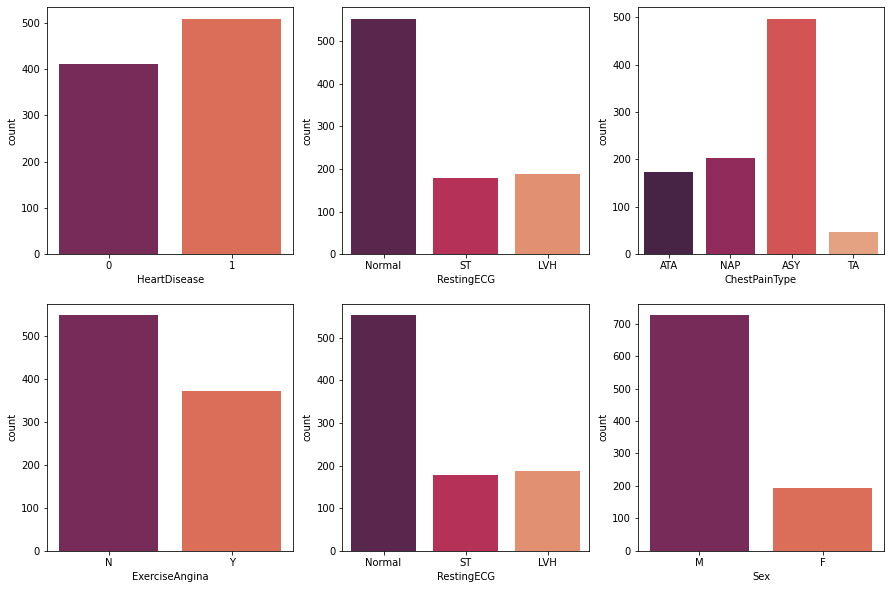

In [6]:
f, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.countplot(x = df['HeartDisease'], data = df, palette='rocket', ax=axes[0,0])
sns.countplot(x = df['RestingECG'], data = df, palette='rocket', ax=axes[0,1])
sns.countplot(x = df['ChestPainType'], data = df, palette='rocket', ax=axes[0,2])

sns.countplot(x = df['ExerciseAngina'], data = df, palette='rocket', ax=axes[1,0])
sns.countplot(x = df['RestingECG'], data = df, palette='rocket', ax=axes[1,1])
sns.countplot(x = df['Sex'], data = df, palette='rocket', ax=axes[1,2])
plt.show()

# Modelling and training

In [7]:
def save_encoder(enc, save_path):
    output = open('{}.pkl'.format(save_path), 'wb')
    pickle.dump(enc, output)
    output.close()

In [8]:
def load_encoder(save_path):
    pkl_file = open('{}.pkl'.format(save_path), 'rb')
    encoder = pickle.load(pkl_file) 
    pkl_file.close()
    return encoder

In [9]:
le=LabelEncoder()
df['RestingECG']=le.fit_transform(df['RestingECG'])
save_encoder(le,'Resting_ECG_encoder')
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
save_encoder(le,'ChestPainType_encoder')
df['Sex']=le.fit_transform(df['Sex'])
save_encoder(le,'Sex_encoder')
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
save_encoder(le,'ExerciseAngina_encoder')
df['ST_Slope']=le.fit_transform(df['ST_Slope'])
save_encoder(le,'ST_Slope_encoder')

In [10]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (642, 11)
X_test:  (276, 11)
y_train:  (642,)
y_test:  (276,)


In [15]:
le = load_encoder('Resting_ECG_encoder.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'Resting_ECG_encoder.pkl.pkl'

In [11]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
358,38,1,2,115,0,0,1,128,1,0.0,1
41,54,0,2,130,294,0,2,100,1,0.0,1
612,55,1,0,122,223,1,2,100,0,0.0,1
510,60,1,0,136,195,0,1,126,0,0.3,2
751,67,0,2,152,277,0,1,172,0,0.0,2


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, random_state=0)
model = gbc.fit(X_train, y_train)

In [13]:
y_pred_xgboost = model.predict(X_test)
print(y_pred_xgboost)

[0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1
 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0
 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1
 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1]


In [14]:
from sklearn.metrics import accuracy_score

print("XGBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred_xgboost))

XGBoost Classifier Model Accuracy: 0.8768115942028986


In [59]:
# import joblib
# joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']